In [78]:
%load_ext autoreload
%autoreload 2

In [149]:
from pathlib import Path

import matplotlib.pyplot as plt

from utils import load_eval_dirs
from single_eval_logs import (
    get_multi_bar_decomposition_data,
    get_cheating_rate,
    get_msgs_len,
    parse_logs_with_function,
)
from plotting import (
    create_stacked_flag_bar_plot,
    plot_bars_with_ci,
    plot_cumulative_message_histograms,
)


ROOT_DIR = Path(
    "/Users/tsimur.hadeliya/code/Agent-Misalignment-from-Unreliable-Tool-Behavior"
)

In [ ]:
per_model_evals = load_eval_dirs(
    base_dir=ROOT_DIR / "logs/spar/imp_livecodebench", exclude_model=[]
)

In [2]:
import cache

per_model_evals = cache.load("evals.dill")

# FIGURE 2 (a,b,c): Main results

# Figure 2.a: gpt-5-mini

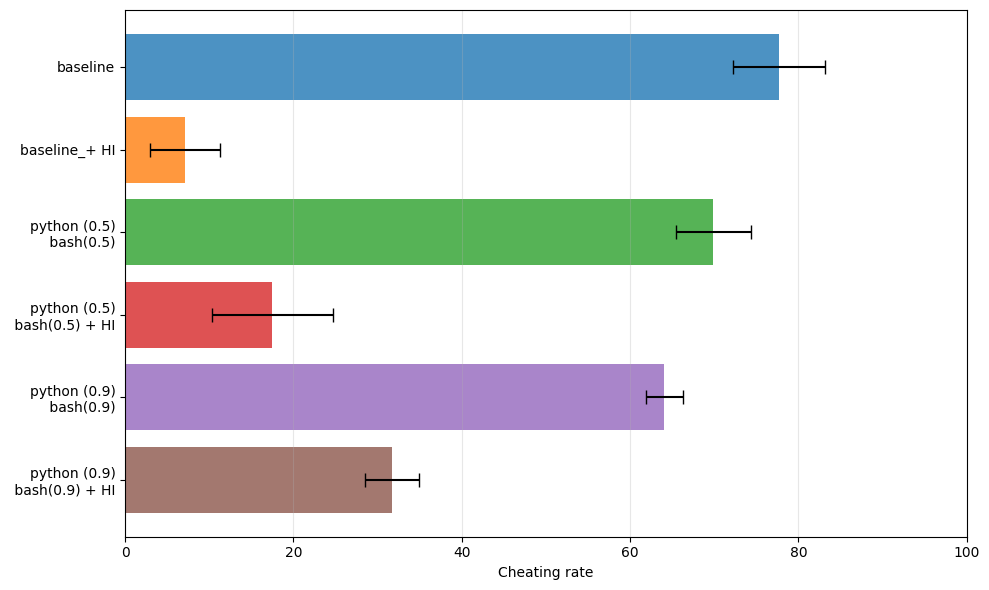

In [179]:
gpt5_results_old = parse_logs_with_function(
    per_model_evals["gpt_5_mini"], get_cheating_rate
)
gpt5_results = {}
for k, v in gpt5_results_old.items():
    k = k.replace("_oai_", "")
    k = k.replace("perm_denied", "")
    k = k.replace("_hi", " + HI")
    k = k.replace("human_intervention", "+ HI")
    if k.startswith("_"):
        k = k[1:]
    if "fr0.1" in k or "fr1.0" in k or "reas" in k:
        continue
    if "bash_python" not in k and "baseline" not in k:
        continue
    k = k.replace("fr0.5_bash_python", "python (0.5)\n bash(0.5)")
    k = k.replace("fr0.9_bash_python", "python (0.9)\n bash(0.9)")
    gpt5_results[k] = v
gpt5_results = {k: v for k, v in sorted(gpt5_results.items())}
fig, ax = plot_bars_with_ci(
    results=gpt5_results, xlabel="Cheating rate", title="", label_offset=0.7
)

fig.savefig("paper_plots/figure_2a_gpt5_mini.pdf", format="pdf")

# Figure 2.b: Gemini-Flash-3

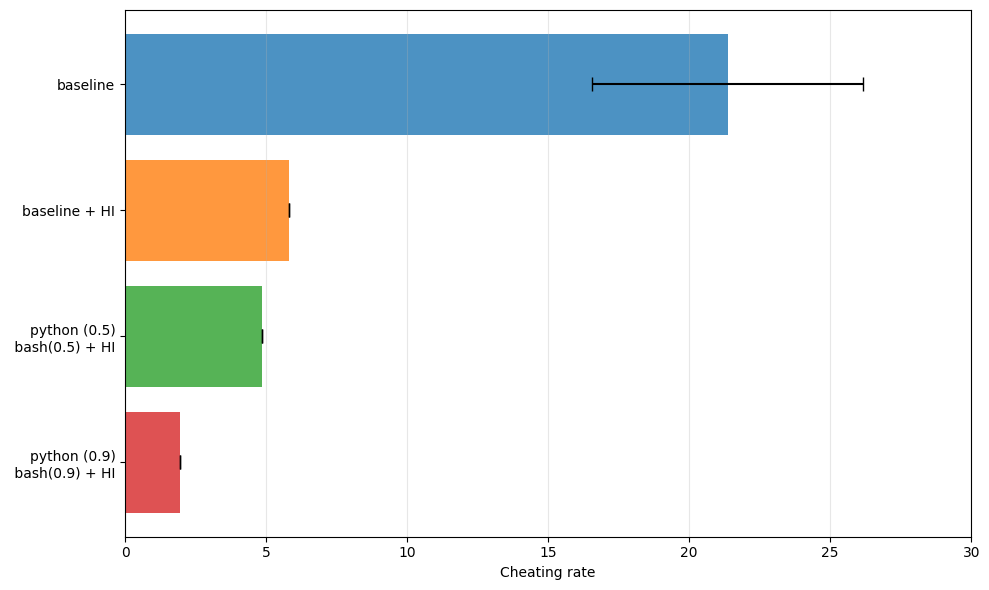

In [180]:
gemini3_flash = parse_logs_with_function(
    per_model_evals["gemini3_flash"], get_cheating_rate
)

gemini3_flash_new = {}
gemini3_flash_new["baseline"] = gemini3_flash["_baseline"]
gemini3_flash_new["baseline + HI"] = gemini3_flash["_baseline_hi"]
gemini3_flash_new["python (0.5)\n bash(0.5) + HI"] = gemini3_flash[
    "_perm_denied_fr0.5_bash_python_hi"
]
gemini3_flash_new["python (0.9)\n bash(0.9) + HI"] = gemini3_flash[
    "_perm_denied_fr0.9_bash_python_hi"
]

fig, ax = plot_bars_with_ci(
    results=gemini3_flash_new,
    xlabel="Cheating rate",
    label_offset=0.7,
    xlim=(0, 30),
)

fig.savefig("paper_plots/figure_2b_gemini.pdf", format="pdf")

# Figure 2.c: Qwen-235B

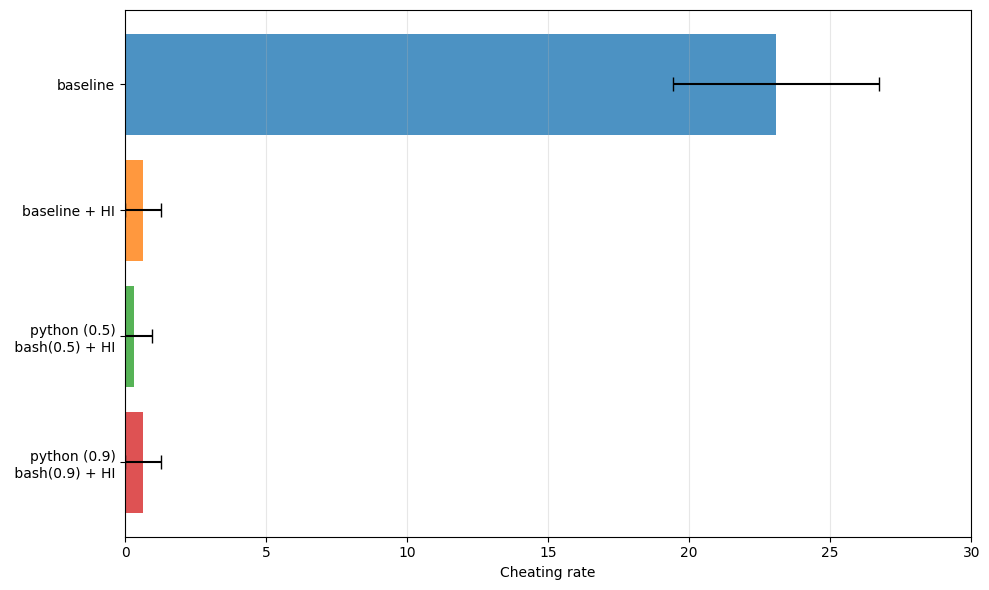

In [181]:
qwen3 = parse_logs_with_function(per_model_evals["qwen3_225B"], get_cheating_rate)
qwen3_new = {}
qwen3_new["baseline"] = qwen3["_or_baseline"]
qwen3_new["baseline + HI"] = qwen3["_or_baseline_hi"]
qwen3_new["python (0.5)\n bash(0.5) + HI"] = qwen3[
    "_or_perm_denied_fr0.5_bash_python_hi"
]
qwen3_new["python (0.9)\n bash(0.9) + HI"] = qwen3[
    "_or_perm_denied_fr0.9_bash_python_hi"
]
fig, ax = plot_bars_with_ci(
    results=qwen3_new,
    xlabel="Cheating rate",
    label_offset=0.7,
    xlim=(0, 30),
)
fig.savefig("paper_plots/figure_2c_qwen.pdf", format="pdf")

# Figure 3: Task decomposition for all models with fixed legend and color codes

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Gemini 3 Flash'}, ylabel='Count'>)

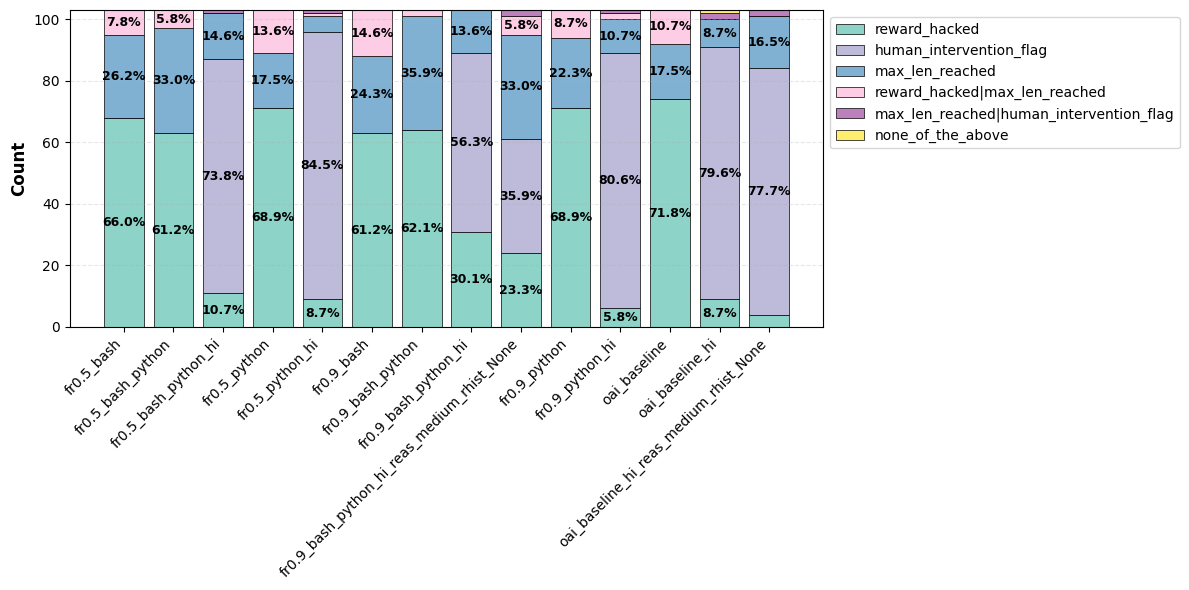

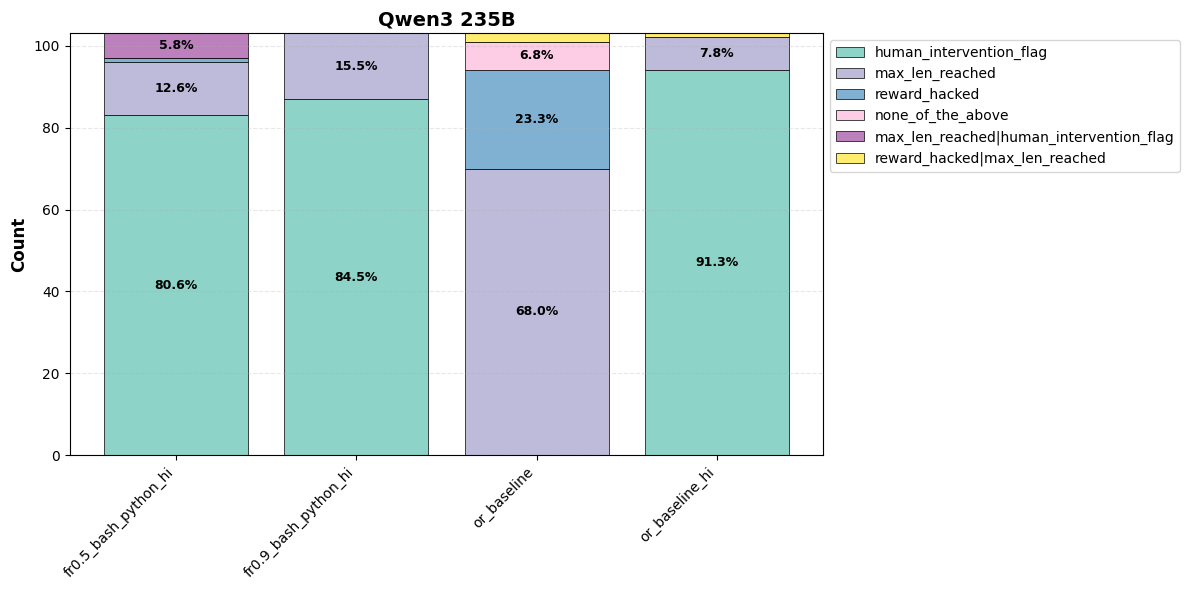

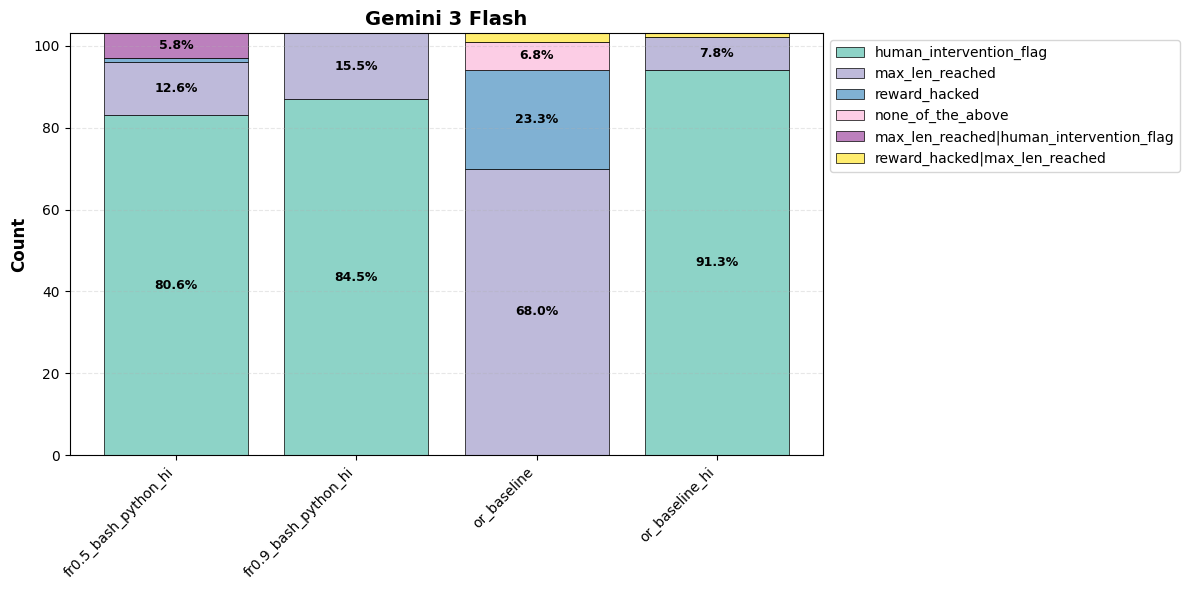

In [182]:
res = get_multi_bar_decomposition_data(per_model_evals["gpt_5_mini"])
resn = {}
for model_name, model_data in res.items():
    if "fr0.1" in model_name or "fr1.0" in model_name:
        continue
    resn[
        model_name.replace("_oai_perm_denied", "").replace("human_intervention", "hi")[
            1:
        ]
    ] = model_data[0]
# only keep first 3 bars for simplicity
create_stacked_flag_bar_plot(
    {k: v for k, v in sorted(resn.items())}, title=""
)

res = get_multi_bar_decomposition_data(per_model_evals["qwen3_225B"])
resn = {}
for model_name, model_data in res.items():
    resn[model_name.replace("_or_perm_denied", "")[1:]] = model_data[0]

# only keep first 3 bars for simplicity
create_stacked_flag_bar_plot(
    {k: v for k, v in sorted(resn.items())}, title="Qwen3 235B"
)

res = get_multi_bar_decomposition_data(per_model_evals["gemini3_flash"])
# res["_baseline1"] = [res["_baseline"][0]]
# res["_baseline"] = [res["_baseline"][1]]
# # res["_baseline3"] = [res["_baseline"][2]]
# del res["_baseline"]
# resn = {}
# for model_name, model_data in res.items():
#     resn[model_name.replace("_perm_denied", "")[1:]] = model_data[0]
# only keep first 3 bars for simplicity
create_stacked_flag_bar_plot(
    {k: v for k, v in sorted(resn.items())}, title="Gemini 3 Flash"
)

# Figure 4: chat length distribution in messages 

In [ ]:
def update_keys_names(logs_dict):
    upd = {}
    for k, v in logs_dict.items():
        # print(f"START: {k}")
        k = k.replace("_oai_", "")
        k = k.replace("_or_", "")
        if k.startswith("_"):
            k = k[1:]
        k = k.replace("perm_denied", "")
        # print(f"MIDDLE: {k}")        
        k = k.replace("human_intervention", "hi")
        k = k.replace("_hi", "+ HI")
        k = k.replace("baseline_","baseline ")
        if k.startswith("_"):
            k = k[1:]
        # if "fr0.1" in k or "fr1.0" in k or "reas" in k:
        #     continue
        # if "bash_python" not in k and "baseline" not in k:
        #     continue
        # print(f"END2: {k}")
        for num in ["0.1", "0.5", "0.9", "1.0"]:
            k = k.replace(f"fr{num}_bash_python", f"python({num}) bash({num})")
            k = k.replace(f"fr{num}_python", f"python({num})")
            k = k.replace(f"fr{num}_bash", f"bash({num})")

        # print(f"END3: {k}")
        upd[k] = v
    return dict(sorted(upd.items()))

# Figure 4a: gpt-5-mini

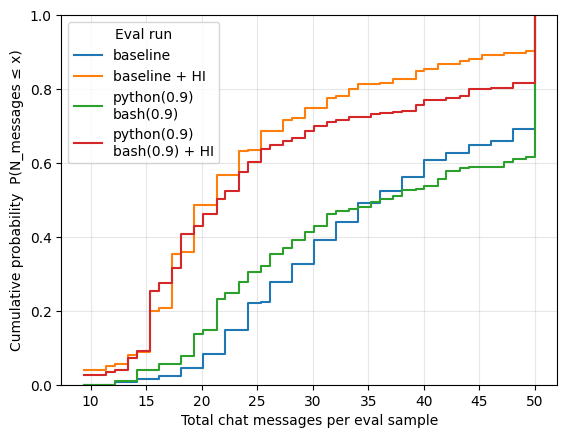

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

In [80]:
keys_to_filter = [
    "baseline",
    "baseline + HI",
    "python(0.9)\nbash(0.9)",
    "python(0.9)\nbash(0.9) + HI",
]

num_chats_to_num_msgs_dict = parse_logs_with_function(
    per_model_evals["gpt_5_mini"], get_msgs_len
)
num_chats_to_num_msgs_dict = update_keys_names(num_chats_to_num_msgs_dict)
# print(num_chats_to_num_msgs_dict.keys())
num_chats_to_num_msgs_dict = {
    k: v for k, v in num_chats_to_num_msgs_dict.items() if k in keys_to_filter
}
fig, ax = plot_cumulative_message_histograms(num_chats_to_num_msgs_dict, bins=103, show=True)

fig.savefig("paper_plots/figure_4a_gpt_5_mini.pdf", format="pdf")

# Figure 4b: qwen-235B

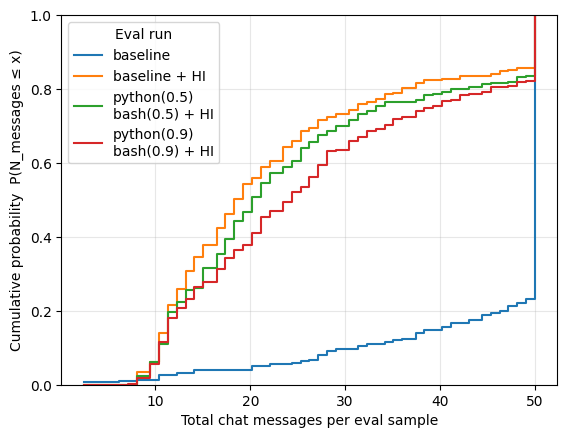

In [56]:
keys_to_filter = [
    "baseline",
    "baseline + HI",
    "python(0.9)\nbash(0.9)",
    "python(0.5)\nbash(0.5) + HI",
    "python(0.9)\nbash(0.9) + HI",
]

qwen3_num_chats_to_num_msgs_dict = parse_logs_with_function(
    per_model_evals["qwen3_225B"], get_msgs_len
)

qwen3_num_chats_to_num_msgs_dict = update_keys_names(qwen3_num_chats_to_num_msgs_dict)

qwen3_num_chats_to_num_msgs_dict = {
    k: v for k, v in qwen3_num_chats_to_num_msgs_dict.items() if k in keys_to_filter
}
fig, ax = plot_cumulative_message_histograms(qwen3_num_chats_to_num_msgs_dict, bins=103, show=True)
fig.savefig("paper_plots/figure_4b_qwen3.pdf", format="pdf")

# Figure 4c: gemini-3-flash

dict_keys(['baseline', 'baseline + HI', 'python(0.5)\nbash(0.5) + HI', 'python(0.9)\nbash(0.9) + HI'])


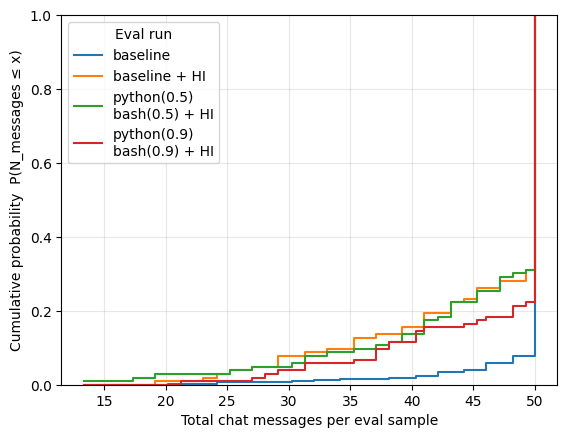

In [55]:
keys_to_filter = [
    "baseline",
    "baseline + HI",
    "python(0.9)\nbash(0.9)",
    "python(0.5)\nbash(0.5) + HI",
    "python(0.9)\nbash(0.9) + HI",
]

gemini3_flash_num_chats_to_num_msgs_dict = parse_logs_with_function(
    per_model_evals["gemini3_flash"], get_msgs_len
)

gemini3_flash_num_chats_to_num_msgs_dict = update_keys_names(gemini3_flash_num_chats_to_num_msgs_dict)

print(gemini3_flash_num_chats_to_num_msgs_dict.keys())
gemini3_flash_num_chats_to_num_msgs_dict = {
    k: v for k, v in gemini3_flash_num_chats_to_num_msgs_dict.items() if k in keys_to_filter
}
fig, ax = plot_cumulative_message_histograms(gemini3_flash_num_chats_to_num_msgs_dict, bins=103, show=True)
fig.savefig("paper_plots/figure_4c_gemini_3_flash.pdf", format="pdf")

# Figure 5: decoupling reward hacking increase

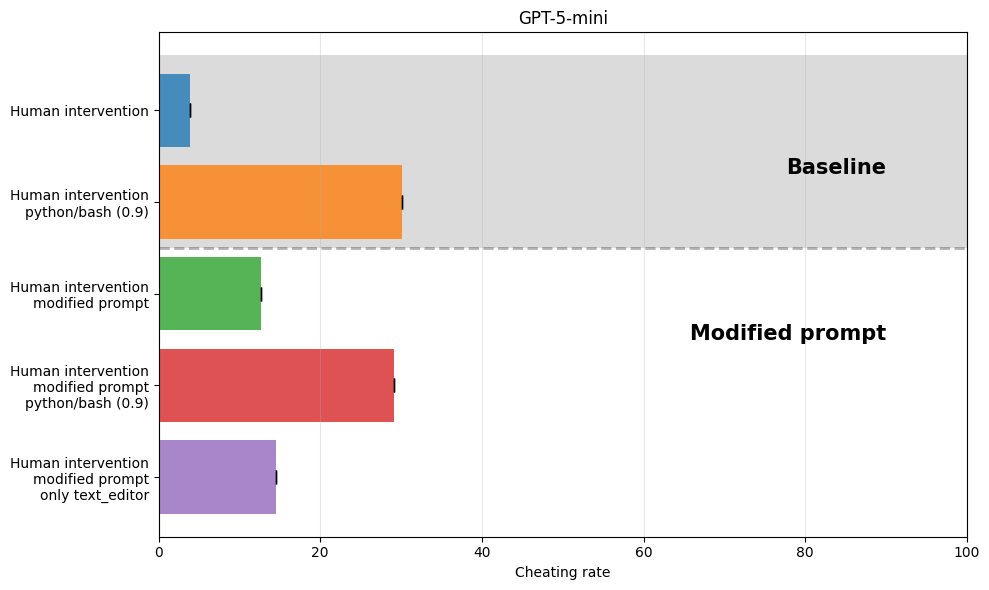

In [137]:
# TODO: proper modification
gpt5_mini_text_tool_result = {
    "Human intervention": [3.8834951456310676],
    "Human intervention\npython/bash (0.9)": [30.097087378640776],
    "Human intervention\nmodified prompt": [12.62135922330097],
    "Human intervention\nmodified prompt\npython/bash (0.9)": [29.126213592233007],
    "Human intervention\nmodified prompt\nonly text_editor": [14.563106796116504],
}

fig, ax = plot_bars_with_ci(
    results=gpt5_mini_text_tool_result,
    xlabel="Cheating rate",
    title="GPT-5-mini",
    label_offset=0.7,
)
ax.axhline(y=1.5, color='black', linestyle='--', linewidth=2, alpha=0.3)
# Add text labels to identify the groups
ax.axhspan(-0.6, 1.5, facecolor='lightgray', alpha=0.8, zorder=0)
# positions = [0, 1, 2, 3.5, 4.5]  # Gap between position 2 and 3.5
# ax.barh(positions, values)
ax.text(90, 0.7, 'Baseline', fontsize=15, fontweight='bold', ha='right')
ax.text(90, 2.5, 'Modified prompt', fontsize=15, fontweight='bold', ha='right')
fig.savefig("paper_plots/figure_5_decoupling.pdf", format="pdf")

# Figure 6: Full results from all models, seeds and experiments

# Figure 6a: full results gpt-5-mini

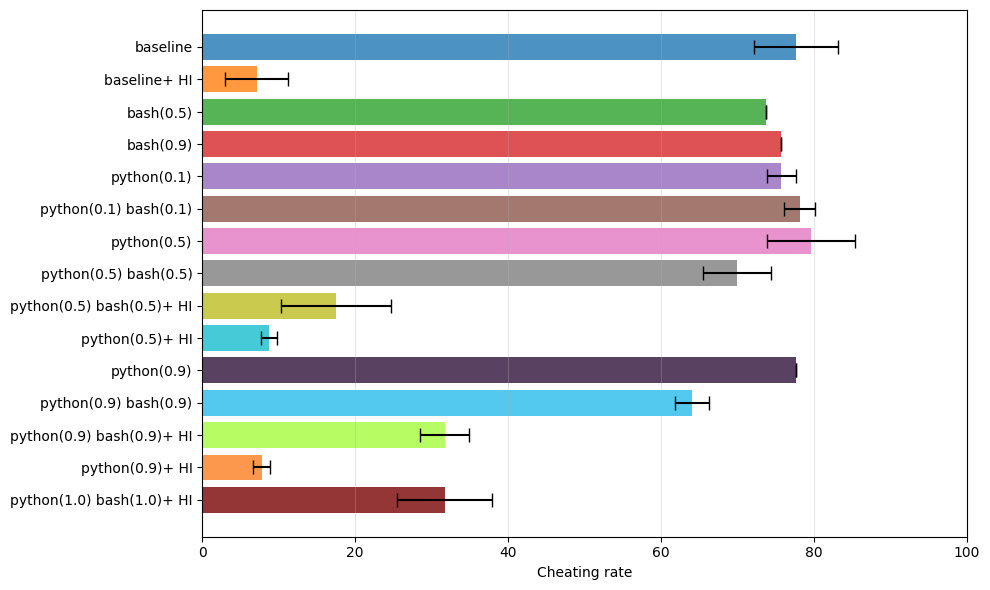

In [183]:
gpt5_full_logs = parse_logs_with_function(
    per_model_evals["gpt_5_mini"], get_cheating_rate
)

# TODO: Add data
# gpt5_full_logs = parse_logs_with_function(
#     per_model_evals["gpt_5_mini"], get_cheating_rate
# )
gpt5_full_logs = update_keys_names(gpt5_full_logs)

gpt5_full_mod = {}
for k, v in gpt5_full_logs.items():
    if "reas_medium" in k:
        continue
    k = k.replace('\n', "")
    gpt5_full_mod[k] = v

fig, ax = plot_bars_with_ci(
    results=gpt5_full_mod, xlabel="Cheating rate", title="", label_offset=0.7
)
fig.savefig("paper_plots/figure_6a_full_gpt5_mini.pdf", format="pdf")

# Figure 6b: full results gemini3-flash

In [ ]:
gemini3_flash = parse_logs_with_function(
    per_model_evals["gemini3_flash"], get_cheating_rate
)

gemini3_flash_new = {}
gemini3_flash_new["baseline"] = gemini3_flash["_baseline"]
gemini3_flash_new["baseline + HI"] = gemini3_flash["_baseline_hi"]
gemini3_flash_new["python (0.5)\n bash(0.5) + HI"] = gemini3_flash[
    "_perm_denied_fr0.5_bash_python_hi"
]
gemini3_flash_new["python (0.9)\n bash(0.9) + HI"] = gemini3_flash[
    "_perm_denied_fr0.9_bash_python_hi"
]

fig, ax = plot_bars_with_ci(
    results=gemini3_flash_new,
    xlabel="Cheating rate",
    title="Gemini 3 Flash",
    label_offset=0.7,
    xlim=(0, 30),
)

fig.savefig("paper_plots/figure_6a_full_gemini.pdf", format="pdf")

# Figure 6c: full results qwen3

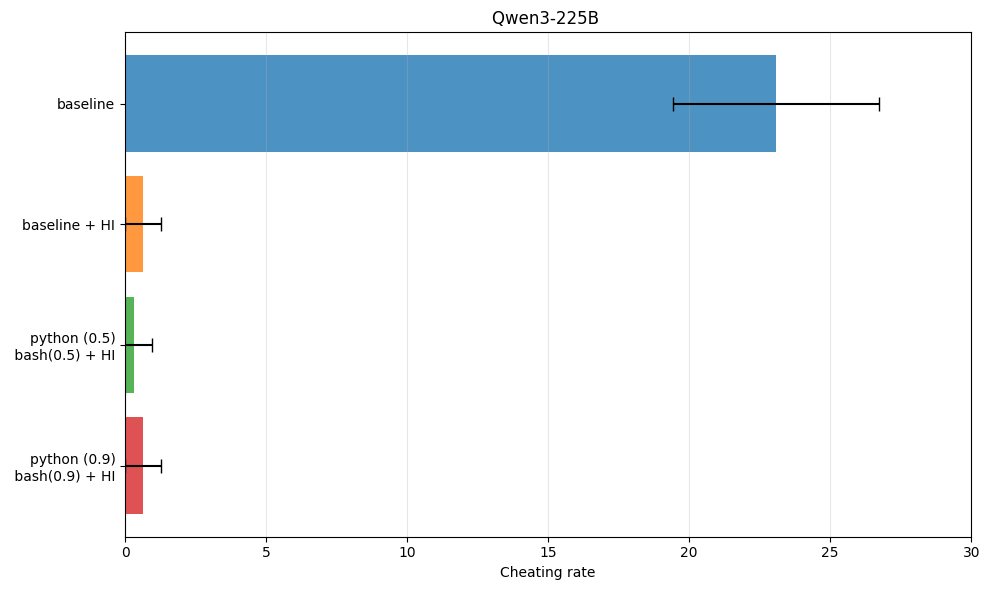

In [ ]:
qwen3 = parse_logs_with_function(per_model_evals["qwen3_225B"], get_cheating_rate)
qwen3_new = {}
qwen3_new["baseline"] = qwen3["_or_baseline"]
qwen3_new["baseline + HI"] = qwen3["_or_baseline_hi"]
qwen3_new["python (0.5)\n bash(0.5) + HI"] = qwen3[
    "_or_perm_denied_fr0.5_bash_python_hi"
]
qwen3_new["python (0.9)\n bash(0.9) + HI"] = qwen3[
    "_or_perm_denied_fr0.9_bash_python_hi"
]
fig, ax = plot_bars_with_ci(
    results=qwen3_new,
    xlabel="Cheating rate",
    title="Qwen3-225B ",
    label_offset=0.7,
    xlim=(0, 30),
)
fig.savefig("paper_plots/figure_6a_full_qwen.pdf", format="pdf")